## 1.Loading the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [180]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

In [4]:
from sklearn.metrics import accuracy_score

## 2.Loading the Dataset

In [5]:
df_train=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/vindhya/janatahack/Train.csv')

In [6]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [7]:
df_test=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/vindhya/janatahack/Test.csv')

In [8]:
df_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


## 3.Exploratory Data Analysis

We will combine both train and test data for the ease of performing EDA. At the time of model building, we will separate it.

In [10]:
df_train['source']='train'
df_test['source']='test'

In [11]:
df_cust=pd.concat([df_train,df_test],ignore_index=True)

In [12]:
df_cust.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,source
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,train
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,train
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,train
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,train
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,train


In [13]:
df_cust.shape

(10695, 12)

In [14]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
 11  source           10695 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1002.8+ KB


In [15]:
df_cust.Graduated.value_counts()

Yes    6570
No     4023
Name: Graduated, dtype: int64

In [16]:
df_cust.Profession.value_counts()

Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: Profession, dtype: int64

In [17]:
df_cust.Segmentation.value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [18]:
df_cust.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [19]:
#Checking for outliers

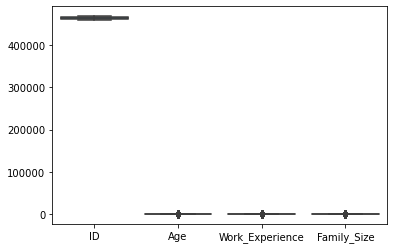

In [20]:
sns.boxplot(data=df_cust)
plt.show()

In [21]:
#Converting the Age column into a categorical column

In [22]:
df_cust['age_cat']=pd.cut(df_cust.Age,bins=[15,30,60,90],labels=['young','middle','old'])

In [23]:
df_cust.age_cat.value_counts()

middle    6201
young     2701
old       1793
Name: age_cat, dtype: int64

In [24]:
#Dropping the Age column since we donot require it now.

df_cust=df_cust.drop('Age',axis=1)

In [25]:
#Treating the outliers

In [26]:
cols=['Work_Experience','Family_Size']

In [27]:
def boundaries(data,variable):
    LL=data[variable].quantile(.25)-(((data[variable].quantile(.75))-(data[variable].quantile(.25)))*1.5)
    UL=data[variable].quantile(.75)+(((data[variable].quantile(.75))-(data[variable].quantile(.25)))*1.5)
    return LL,UL

In [28]:
for col in cols:
    LL,UL=boundaries(df_cust,col)
    
    df_cust[col]=np.where(df_cust[col]<LL,LL,
                         np.where(df_cust[col]>UL,UL,df_cust[col]))

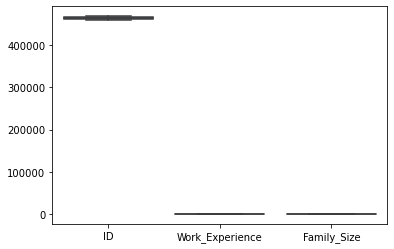

In [29]:
sns.boxplot(data=df_cust)
plt.show()

We can see that the outliers have been treated now.

In [30]:
#Checking for missing values

In [31]:
df_cust.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
source                0
age_cat               0
dtype: int64

In [32]:
df_cust.Ever_Married.value_counts()

Yes    6163
No     4342
Name: Ever_Married, dtype: int64

We can find that we have missing values in Ever_married,Graduated,Profession,Work_Experience,Family_Size,Var_1 columns. We need to treat them before proceeding to model building.

In [33]:
cols=['Ever_Married','Graduated','Profession','Var_1']

In [34]:
for col in cols:
    df_cust[col]=df_cust[col].fillna(df_cust[col].mode()[0])

In [35]:
df_cust.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Graduated             0
Profession            0
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1                 0
Segmentation       2627
source                0
age_cat               0
dtype: int64

In [36]:
#Filling the null values in Work_Experience based on their Profession

In [37]:
missing_index=df_cust.loc[df_cust.Work_Experience.isnull(),['Profession','Work_Experience']]

In [38]:
df1=df_cust.groupby('Profession')['Work_Experience'].mean().round(0)

In [39]:
df_cust.loc[missing_index.index,'Work_Experience']=df_cust.loc[missing_index.index,'Profession'].apply(lambda x:df1.loc[x])

In [40]:
#Filling the null values in Family_Size based on their marriage

In [41]:
missing_index1=df_cust.loc[df_cust.Family_Size.isnull(),['Ever_Married','Family_Size']]

In [42]:
df2=df_cust.groupby('Ever_Married')['Family_Size'].median()

In [43]:
df_cust.loc[missing_index1.index,'Family_Size']=df_cust.loc[missing_index1.index,'Ever_Married'].apply(lambda x:df2.loc[x])

In [44]:
df_cust.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation       2627
source                0
age_cat               0
dtype: int64

The missing value have been treated now.

In [45]:
#Correlation

In [46]:
vcorr=df_cust.corr()

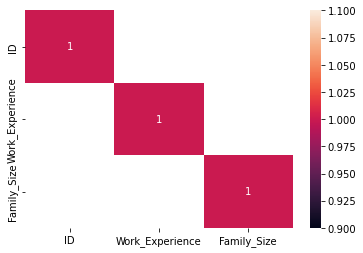

In [47]:
sns.heatmap(vcorr[(vcorr>0.85) | (vcorr<-0.85)],annot=True)
plt.show()

There is no strong correlation between the features.

In [48]:
#Creating a backup file

In [49]:
df_cust1=df_cust.copy(deep=True)

## 4.Separating the train and test set

In [51]:
df_train=df_cust1.loc[df_cust1['source']=='train']
df_test=df_cust1.loc[df_cust1['source']=='test']

In [52]:
df_train.shape,df_test.shape

((8068, 12), (2627, 12))

In [53]:
df_train1=df_train.drop(['ID','source'],axis=1)

In [54]:
df_test1=df_test.drop(['source','ID','Segmentation'],axis=1)

In [55]:
df_train1.shape,df_test1.shape

((8068, 10), (2627, 9))

## 5.Splitting into X_train and y_train

In [58]:
X_train=df_train1.drop('Segmentation',axis=1)

In [59]:
y_train=df_train1['Segmentation']

In [60]:
X_test=df_test1

## 6.Dummy Encoding

In [62]:
X_train=pd.get_dummies(X_train,drop_first=True)

In [63]:
X_train.shape

(8068, 23)

In [64]:
X_test=pd.get_dummies(X_test,drop_first=True)

In [65]:
X_test.shape

(2627, 23)

In [66]:
le=LabelEncoder()

In [67]:
y_train=le.fit_transform(y_train)

In [68]:
y_train.shape

(8068,)

## 7.Scaling the data 

In [70]:
sc=StandardScaler()

In [71]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

## 8.Model Building

1.Logistic Regression

In [73]:
lr=LogisticRegression()

In [74]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [75]:
y_pred_train=lr.predict(X_train_scaled)

In [76]:
y_pred_test=lr.predict(X_test_scaled)

In [77]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

Training Accuracy is:  0.5154933068914229


In [78]:
y_pred_test

array([0, 2, 1, ..., 0, 1, 3])

In [79]:
submit_lr=pd.DataFrame({'ID':df_test['ID'],'Segmentation':y_pred_test})

In [80]:
def segment(i):
    if i==0:
        i='A'
    elif i==1:
        i='B'
    elif i==2:
        i='C'
    else:
        i='D'
    return i

In [81]:
submit_lr['Segmentation']=submit_lr['Segmentation'].apply(segment)

In [82]:
submit_lr.to_csv('janatahack.submit_lr.csv',index=False)

2.Decision Tree

In [85]:
dt=DecisionTreeClassifier()

In [86]:
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [88]:
y_pred_train=dt.predict(X_train_scaled)

In [89]:
y_pred_test=dt.predict(X_test_scaled)

In [90]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

Training Accuracy is:  0.798834903321765


In [91]:
submit_dt=pd.DataFrame({'ID':df_test['ID'],'Segmentation':y_pred_test})

In [92]:
submit_dt['Segmentation']=submit_dt['Segmentation'].apply(segment)

In [93]:
submit_dt.to_csv('janatahack.submit_dt.csv',index=False)

3.Random Forest Classifier

In [94]:
rf=RandomForestClassifier()

In [95]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [96]:
y_pred_train=rf.predict(X_train_scaled)

In [97]:
y_pred_test=rf.predict(X_test_scaled)

In [98]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

Training Accuracy is:  0.798834903321765


In [99]:
submit_rf=pd.DataFrame({'ID':df_test['ID'],'Segmentation':y_pred_test})

In [100]:
submit_rf['Segmentation']=submit_rf['Segmentation'].apply(segment)

In [101]:
submit_rf.to_csv('janatahack.submit_rf.csv',index=False)

4.GridSearchCV

In [103]:
tuned_parameters={'n_estimators':[85,100],'min_samples_split':[15,20],'max_depth':[8,10]}

In [104]:
gs_model=GridSearchCV(estimator=rf,param_grid=tuned_parameters,cv=5)
gs_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10], 'min_samples_split': [15, 20],
                         'n_estimators': [85, 100]})

In [105]:
print('The best parameters are: ',gs_model.best_params_)

The best parameters are:  {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 100}


In [106]:
#Rebuilding the model

In [108]:
rf=RandomForestClassifier(n_estimators=100,min_samples_split=15,max_depth=10)

In [109]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=15)

In [113]:
y_pred_train=rf.predict(X_train_scaled)

In [114]:
y_pred_test=rf.predict(X_test_scaled)

In [115]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

Training Accuracy is:  0.5816807139315816


In [116]:
submit_GridSearchCV_rf=pd.DataFrame({'ID':df_test['ID'],'Segmentation':y_pred_test})

In [117]:
submit_GridSearchCV_rf['Segmentation']=submit_GridSearchCV_rf['Segmentation'].apply(segment)

In [118]:
submit_GridSearchCV_rf.to_csv('janatahack.submit_GridSearchCV_rf.csv',index=False)

5.XGBClassifier

In [128]:
xgb=XGBClassifier()

In [129]:
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [130]:
y_pred_train=xgb.predict(X_train_scaled)

In [131]:
y_pred_test=xgb.predict(X_test_scaled)

In [132]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

Training Accuracy is:  0.6916212196331185


In [133]:
submit_xgb=pd.DataFrame({'ID':df_test['ID'],'Segmentation':y_pred_test})

In [134]:
submit_xgb['Segmentation']=submit_xgb['Segmentation'].apply(segment)

In [135]:
submit_xgb.to_csv('janatahack.submit_xgb.csv',index=False)

6.Gradient Boosting Classifier

In [136]:
gb=GradientBoostingClassifier()

In [137]:
gb.fit(X_train_scaled,y_train)

GradientBoostingClassifier()

In [138]:
y_pred_train=gb.predict(X_train_scaled)

In [139]:
y_pred_test=gb.predict(X_test_scaled)

In [140]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

Training Accuracy is:  0.5483391175012394


In [141]:
submit_gb=pd.DataFrame({'ID':df_test['ID'],'Segmentation':y_pred_test})

In [142]:
submit_gb['Segmentation']=submit_gb['Segmentation'].apply(segment)

In [143]:
submit_gb.to_csv('janatahack.submit_gb.csv',index=False)

7.AdaBoostClassifier

In [144]:
ab=AdaBoostClassifier()

In [145]:
ab.fit(X_train_scaled,y_train)

AdaBoostClassifier()

In [146]:
y_pred_train=ab.predict(X_train_scaled)

In [147]:
y_pred_test=ab.predict(X_test_scaled)

In [148]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

Training Accuracy is:  0.49801685671789786


In [149]:
submit_ab=pd.DataFrame({'ID':df_test['ID'],'Segmentation':y_pred_test})

In [150]:
submit_ab['Segmentation']=submit_ab['Segmentation'].apply(segment)

In [151]:
submit_ab.to_csv('janatahack.submit_ab.csv',index=False)

8.LGBMClassifier

In [152]:
lgbm=LGBMClassifier()

In [153]:
lgbm.fit(X_train_scaled,y_train)

LGBMClassifier()

In [154]:
y_pred_train=lgbm.predict(X_train_scaled)

In [155]:
y_pred_test=lgbm.predict(X_test_scaled)

In [156]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

Training Accuracy is:  0.631011403073872


In [157]:
submit_lgbm=pd.DataFrame({'ID':df_test['ID'],'Segmentation':y_pred_test})

In [158]:
submit_lgbm['Segmentation']=submit_lgbm['Segmentation'].apply(segment)

In [159]:
submit_lgbm.to_csv('janatahack.submit_lgbm.csv',index=False)

9.Naive Bayes

In [160]:
gnb=GaussianNB()

In [161]:
gnb.fit(X_train_scaled,y_train)

GaussianNB()

In [162]:
y_pred_train=gnb.predict(X_train_scaled)

In [163]:
y_pred_test=gnb.predict(X_test_scaled)

In [164]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

Training Accuracy is:  0.4688894397620228


In [165]:
submit_gnb=pd.DataFrame({'ID':df_test['ID'],'Segmentation':y_pred_test})

In [166]:
submit_gnb['Segmentation']=submit_gnb['Segmentation'].apply(segment)

In [167]:
submit_gnb.to_csv('janatahack.submit_gnb.csv',index=False)

10.KNN

In [168]:
k_values=range(3,21)

In [169]:
acc_score={}

In [171]:
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred_train=knn.predict(X_train_scaled)
    y_pred_test=knn.predict(X_test_scaled)
    acc_score[k]=accuracy_score(y_train,y_pred_train)

In [172]:
max(acc_score.values())

0.6331184928111055

In [173]:
max(acc_score,key=acc_score.get)

3

In [174]:
#Rebuilding the model

In [175]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
y_pred_train=knn.predict(X_train_scaled)
y_pred_test=knn.predict(X_test_scaled)

In [176]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

Training Accuracy is:  0.6331184928111055


In [177]:
submit_knn=pd.DataFrame({'ID':df_test['ID'],'Segmentation':y_pred_test})

In [178]:
submit_knn['Segmentation']=submit_knn['Segmentation'].apply(segment)

In [179]:
submit_knn.to_csv('janatahack.submit_knn.csv',index=False)

11.SVC(kernel='linear')

In [181]:
svc1=SVC(kernel='linear')

In [182]:
svc1.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [183]:
y_pred_train=svc1.predict(X_train_scaled)

In [185]:
y_pred_test=svc1.predict(X_test_scaled)

In [186]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

Training Accuracy is:  0.4928111056023798


In [187]:
submit_svc1=pd.DataFrame({'ID':df_test['ID'],'Segmentation':y_pred_test})

In [188]:
submit_svc1['Segmentation']=submit_svc1['Segmentation'].apply(segment)

In [189]:
submit_svc1.to_csv('janatahack.submit_svc1.csv',index=False)

12.SVC(kernel='radial')

In [190]:
svc2=SVC(kernel='rbf')

In [191]:
svc2.fit(X_train_scaled,y_train)

SVC()

In [192]:
y_pred_train=svc2.predict(X_train_scaled)

In [193]:
y_pred_test=svc2.predict(X_test_scaled)

In [194]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

Training Accuracy is:  0.5708973723351513


In [195]:
submit_svc2=pd.DataFrame({'ID':df_test['ID'],'Segmentation':y_pred_test})

In [196]:
submit_svc2['Segmentation']=submit_svc2['Segmentation'].apply(segment)

In [197]:
submit_svc2.to_csv('janatahack.submit_svc2.csv',index=False)

13.SVC(kernel='sigmoid')

In [198]:
svc3=SVC(kernel='sigmoid')

In [199]:
svc3.fit(X_train_scaled,y_train)

SVC(kernel='sigmoid')

In [200]:
y_pred_train=svc3.predict(X_train_scaled)

In [201]:
y_pred_test=svc3.predict(X_test_scaled)

In [202]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

Training Accuracy is:  0.37952404561229547


In [203]:
submit_svc3=pd.DataFrame({'ID':df_test['ID'],'Segmentation':y_pred_test})

In [204]:
submit_svc3['Segmentation']=submit_svc3['Segmentation'].apply(segment)

In [205]:
submit_svc3.to_csv('janatahack.submit_svc3.csv',index=False)

14.SVC(kernel='poly')

In [206]:
svc4=SVC(kernel='poly')

In [207]:
svc4.fit(X_train_scaled,y_train)

SVC(kernel='poly')

In [208]:
y_pred_train=svc4.predict(X_train_scaled)

In [209]:
y_pred_test=svc4.predict(X_test_scaled)

In [213]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

Training Accuracy is:  0.5837878036688151


In [210]:
submit_svc4=pd.DataFrame({'ID':df_test['ID'],'Segmentation':y_pred_test})

In [211]:
submit_svc4['Segmentation']=submit_svc4['Segmentation'].apply(segment)

In [212]:
submit_svc4.to_csv('janatahack.submit_svc4.csv',index=False)

15.GridSearch CV with SVC (poly)

In [214]:
tuned_parameters={'degree':[2,4,6],'gamma':['auto','scale'],'C':[0.25,0.5,1]}

In [215]:
gs_model=GridSearchCV(estimator=SVC(kernel='poly'),param_grid=tuned_parameters,scoring='accuracy',cv=5)
gs_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.25, 0.5, 1], 'degree': [2, 4, 6],
                         'gamma': ['auto', 'scale']},
             scoring='accuracy')

In [216]:
print('Best Parameters are: ',gs_model.best_params_)

Best Parameters are:  {'C': 1, 'degree': 2, 'gamma': 'auto'}


In [219]:
svc5=SVC(kernel='poly',degree=4,gamma='auto',C=1)

In [220]:
svc5.fit(X_train_scaled,y_train)

SVC(C=1, degree=4, gamma='auto', kernel='poly')

In [221]:
y_pred_train=svc5.predict(X_train_scaled)

In [222]:
y_pred_test=svc5.predict(X_test_scaled)

In [223]:
print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

Training Accuracy is:  0.5985374318294496


In [224]:
submit_svc5=pd.DataFrame({'ID':df_test['ID'],'Segmentation':y_pred_test})

In [225]:
submit_svc5['Segmentation']=submit_svc5['Segmentation'].apply(segment)

In [226]:
submit_svc5.to_csv('janatahack.submit_svc5.csv',index=False)

We can see that DecisionTreeClassifier and RandomForestClassifier performs better as compared to other models in terms of train accuracy.